## Описание проекта

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# 1. Подготовка данных

### Предварительное изучение данных

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
import seaborn as sns
%matplotlib inline
import pandas as pd
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestRegressor,
                              AdaBoostRegressor,
                              GradientBoostingRegressor,
                              HistGradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/autos.csv')
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


Наш набор данных содержит 16 столбцов, 9 из которых хранятся в виде строк, а 7 в виде целых чисел. Есть несколько столбцов с нулевыми значениями, но ни один столбец не имеет более чем 20% нулевых значений. Есть несколько столбцов, которые содержат даты, хранящиеся в виде строк.

Начнем с  имен столбцов, чтобы облегчить работу с данными.

In [129]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

Сделаем названия столбцов более удобными и соответствующими питоновским стандартам качества.

In [130]:
data.columns = ['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen']
data.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Красота! Пол дела сделано) Теперь посмотрим описание наших данных


In [131]:
data.describe(include='all')#добавили include='all', чтобы посмотреть все столбцы

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,271174,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,179150
top,2016-03-24 14:49:47,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,17
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


Какие аномалии бросаются в глаза:

1) Существуют объекты с нулевой ценой. 

2) Авто с 1000 и 9999 годом выпуска.

3) Авто с нулевой мощностью и 20000 л.с. Подозрительно совпадает с максимальной ценой авто. 

4) Т.к квантили 50%, 75%, и max равны 150 000 в столбце с пробегом, можно сделать вывод о том, что скорее всего в программе было значение на выбор "Пробег > 150000 км" и специалист соот-но его всегда выбирал при превышении значения пробега 150 000 км.

5) Авто с нулевым месяцем регистрации. 

6) В столбце с кол-вом фото одни 0. Пожалуй, начнем с него.

In [132]:
data['number_of_pictures'].value_counts()

0    354369
Name: number_of_pictures, dtype: int64

Действительно, одни нули. Удалим его, а также почтовый индекс, т.к. во-первых, почтовый индекс владельца еще не говорит о месте продажи(место постоянного проживания владельца может не совпадать с фактическим нахождением авто и самого владельца), а во-вторых, внутри ЕС нет таможенных пошлин, поэтому рынок быстро бы уровнял цены, если бы они сильно расходились в соседних регионах.

In [133]:
data.drop(columns = ['number_of_pictures', 'postal_code'], inplace = True)

### Подготовка данных по цене и пробегу

In [134]:
data['mileage'].value_counts()

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: mileage, dtype: int64

Как мы и описывали ранее, видим огромное кол-во объектов со значением пробега 150000. Наша теория с выбором значения скорее верна, т.к. значения, которые идут до этого, набрали гораздо меньше объектов. Таким образом, в данном столбце дискретные значения от 5000 до 150000.

In [135]:
print(data["price"].unique().shape)
print(data["price"].describe())
data["price"].value_counts().head(20)

(3731,)
count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64


0       10772
500      5670
1500     5394
1000     4649
1200     4594
2500     4438
600      3819
3500     3792
800      3784
2000     3431
999      3364
750      3203
650      3150
4500     3053
850      2946
700      2936
2200     2936
1800     2886
900      2874
950      2793
Name: price, dtype: int64

В стоблце с ценой уже гораздо больше уникальных значений - 3731. При этом 10772 авто с ценой 0 (их надо будет удалить). Посмотрим, что там вообще творится на ценовом дне.

In [136]:
data["price"].value_counts().sort_index(ascending=True).head(20)

0     10772
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
Name: price, dtype: int64

Удалим значения с 0(у нас все-таки сервис по продаже авто, а не по дарению), но оставим с 1. Возможно, состояние машин было настолько ужасным, что их действительно готовы были продать за 1$.

In [137]:
data = data[data['price'] != 0]
data["price"].describe()

count    343597.000000
mean       4555.121974
std        4515.058553
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: price, dtype: float64

### Подготовка данных с датами

Сначала посмотрим на столбцы date_crawled, date_created, last_seen

In [138]:
data[['date_crawled', 'date_created', 'last_seen']][0:10] 

,date_crawled,date_created,last_seen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,2016-04-04 00:00:00,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2016-04-01 00:00:00,2016-04-05 18:18:39
8,2016-04-04 23:42:13,2016-04-04 00:00:00,2016-04-04 23:42:13
9,2016-03-17 10:53:50,2016-03-17 00:00:00,2016-03-31 17:17:06
10,2016-03-26 19:54:18,2016-03-26 00:00:00,2016-04-06 10:45:34


Первые 10 символов в каждом столбце представляют день, поэтому уберем время(крайне маловероятно, что оно оказывает какое-либо влияние на цену авто) и  для всех приведенных выше столбцов посмотрим распределение значений в долях.

In [139]:
data["date_crawled"] = data["date_crawled"].str[:10]
data["date_created"] = data["date_created"].str[:10]
data["last_seen"] = data["last_seen"].str[:10]

Приведем данные к типу datetime

In [140]:
data[["date_crawled", "date_created", "last_seen"]] = data[["date_crawled", "date_created", "last_seen"]].apply(pd.to_datetime)
data[["date_crawled", "date_created", "last_seen"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343597 entries, 0 to 354368
Data columns (total 3 columns):
date_crawled    343597 non-null datetime64[ns]
date_created    343597 non-null datetime64[ns]
last_seen       343597 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 10.5 MB


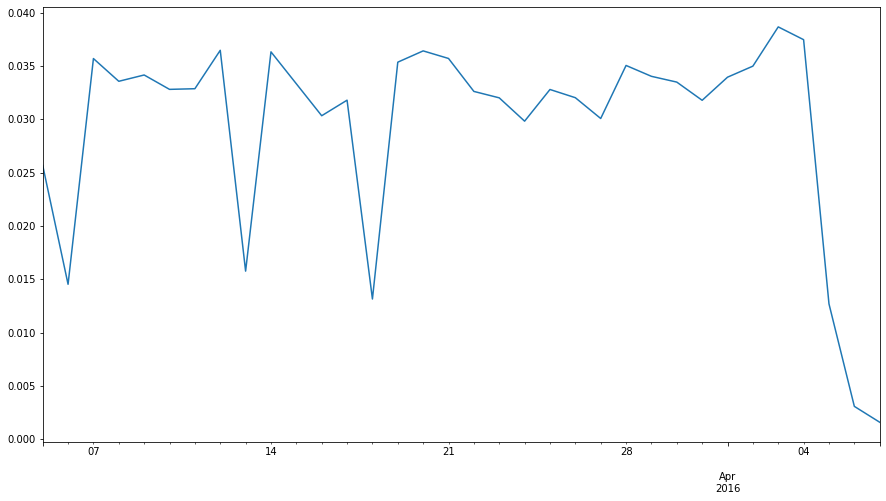

In [141]:
(data["date_crawled"].value_counts(normalize = True, dropna = False)
        .sort_index()
).plot(figsize=(15,8))

Анкеты скачивались из базы примерно равномерно с 05.03.16 до 04.04.2016

In [142]:
print(data["date_created"].unique().shape)
(data["date_created"].value_counts(normalize =True, dropna = False)
                    .sort_index())

(109,)


2014-03-10    0.000003
2015-03-20    0.000003
2015-06-18    0.000003
2015-08-07    0.000003
2015-08-10    0.000003
                ...   
2016-04-03    0.038830
2016-04-04    0.037564
2016-04-05    0.011540
2016-04-06    0.003079
2016-04-07    0.001545
Name: date_created, Length: 109, dtype: float64

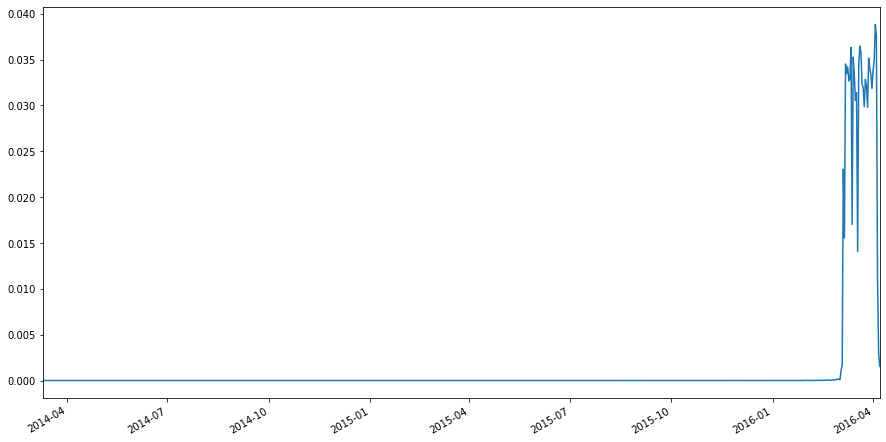

In [143]:
(data["date_created"]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
).plot(figsize=(15,8))

In [144]:
data["date_created"].dt.year.value_counts(normalize = True)

2016    0.999924
2015    0.000073
2014    0.000003
Name: date_created, dtype: float64

In [145]:
data.loc[data["date_created"].dt.year == 2016, "date_created"].dt.month.value_counts(normalize = True).sort_index()

1    0.000201
2    0.001141
3    0.837419
4    0.161239
Name: date_created, dtype: float64

Видим, что с была 1 анкета была создана в 2014 году. Затем прошло больше года и создалась еще одна анкета. Более менее активно анкеты начали создаваться в марте 2016.

In [146]:
(data["last_seen"]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.001301
2016-03-06    0.004249
2016-03-07    0.005338
2016-03-08    0.008172
2016-03-09    0.010096
2016-03-10    0.011743
2016-03-11    0.013257
2016-03-12    0.023947
2016-03-13    0.008641
2016-03-14    0.012387
2016-03-15    0.016650
2016-03-16    0.016706
2016-03-17    0.029305
2016-03-18    0.007023
2016-03-19    0.016741
2016-03-20    0.020277
2016-03-21    0.020489
2016-03-22    0.020806
2016-03-23    0.018330
2016-03-24    0.019601
2016-03-25    0.019438
2016-03-26    0.016243
2016-03-27    0.017099
2016-03-28    0.022710
2016-03-29    0.023691
2016-03-30    0.024057
2016-03-31    0.024578
2016-04-01    0.024214
2016-04-02    0.025277
2016-04-03    0.025655
2016-04-04    0.025757
2016-04-05    0.124611
2016-04-06    0.214399
2016-04-07    0.127213
Name: last_seen, dtype: float64

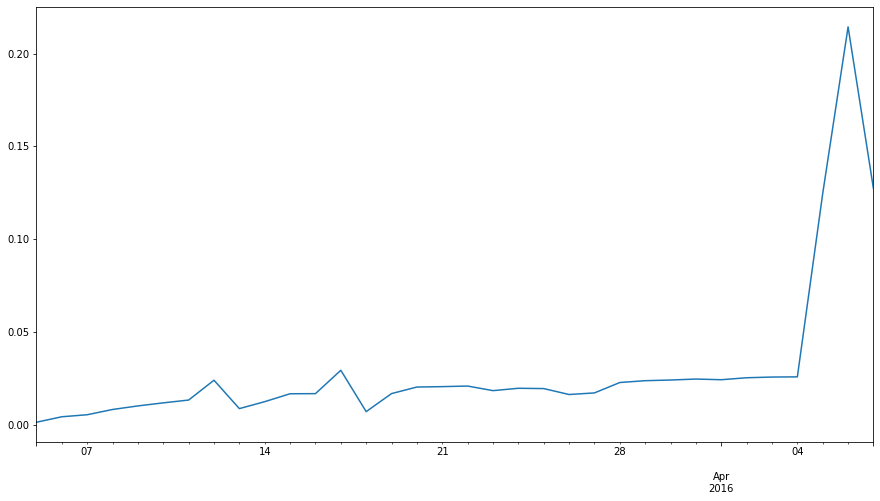

In [147]:
(data["last_seen"]
        .value_counts(normalize = True, dropna = False)
        .sort_index()
).plot(figsize=(15,8))

In [148]:
data["last_seen"].dt.floor("D").value_counts(normalize = True).sort_index().tail().sum()

0.5176354857580246

Как и столбец date_crawled, столбец last_seen охватывает период с 5 марта 2016 года по 7 апреля 2016 года. 

Cтолбец last_seen позволяет нам определить, в какой день запись была удалена, предположительно потому, что автомобиль был продан.

Последние три дня содержат непропорциональное количество активностей пользователей. Учитывая, что они в 6-10 раз превышают значения предыдущих дней, маловероятно, что произошел значительный всплеск продаж, и более вероятно, что эти значения связаны с окончанием периода тестирования системы и не связаны с продажами автомобилей.

Итого, мы выяснили, что подавляющая часть объявлений было создано, скачано и закрыто примерно в течение 1 месяца(с 5 марта по 7 апреля). В течение 1 месяца не может никак проявиться сезонность, поэтому я вообще не вижу никакого смысла использовать данные признаки,т.к. они не могли никак повлиять на стоимость авто. В связи с этим предлагаю их удалить 

In [149]:
data.drop(columns = ["date_crawled", "date_created", "last_seen"], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343597 entries, 0 to 354368
Data columns (total 11 columns):
price                 343597 non-null int64
vehicle_type          309847 non-null object
registration_year     343597 non-null int64
gearbox               326242 non-null object
power                 343597 non-null int64
model                 326076 non-null object
mileage               343597 non-null int64
registration_month    343597 non-null int64
fuel_type             314138 non-null object
brand                 343597 non-null object
not_repaired          277731 non-null object
dtypes: int64(5), object(6)
memory usage: 31.5+ MB


Теперь рассмотрим год регистрации.

In [150]:
data["registration_year"].describe()

count    343597.000000
mean       2004.089797
std          78.413225
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Видим аномальные значения 1000 и 9999.

In [151]:
data["registration_year"].value_counts()

2000    23072
1999    21995
2005    21524
2006    19679
2001    19654
        ...  
1931        1
1927        1
1925        1
3200        1
4100        1
Name: registration_year, Length: 140, dtype: int64

Поскольку автомобиль не может быть впервые зарегистрирован после того, как объявление было просмотрено, любое транспортное средство с годом регистрации выше 2016 года определенно является ошибкой. Определить самый ранний ранний год сложнее. Реально, это может быть где-то в первые несколько десятилетий 1900-х годов, поэтому возьмем за начальную точку отсчета реального года регистрации 1900 год.

Одним из вариантов является удаление списков с этими значениями. Давайте определим, какой процент наших данных имеет недопустимые значения в этом столбце:

In [152]:
(~data["registration_year"].between(1900, 2016)).sum() / data.shape[0]

0.04025646324036589

Учитывая, что это примерно 4% наших данных, мы удалим эти строки.

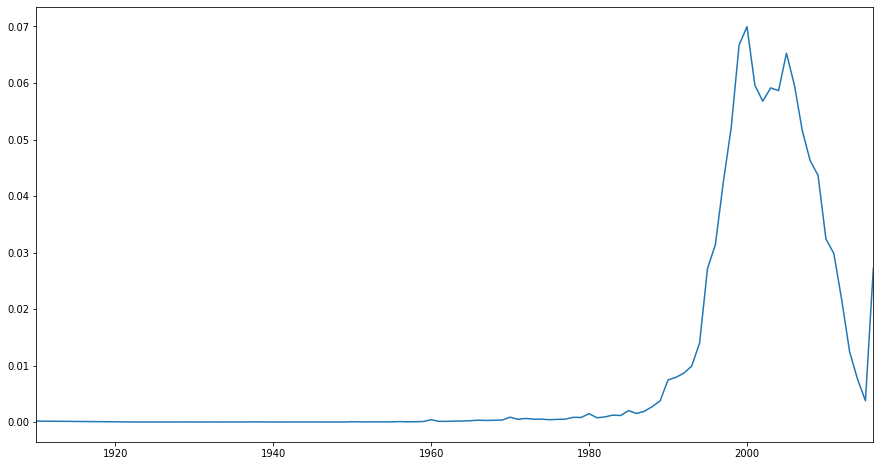

In [153]:
data = data[data["registration_year"].between(1900, 2016)]
data["registration_year"].value_counts(normalize=True).sort_index().plot(figsize=(15,8))

Большинство транспортных средств были зарегистрированы за последние 20 лет до 2016 года.

In [154]:
data.loc[data["registration_year"].between(1906, 2016), "registration_year"].value_counts(normalize = True).sort_index().loc[1970:].sum()

0.9965975770624537

99,7% авто имеют год регистрации авто от 1970. В связи с этим данные до 1970 лучше удалить, т.к. наши модели не смогут адекватно давать ответы по стоимости до 1970 ввиду слишком малого наличия данных за этот период по сравнению с основной группой.

In [155]:
data = data[data["registration_year"].between(1970, 2016)]

Теперь посмотрим на данные с registration_month

In [156]:
data["registration_month"].value_counts()

3     32598
6     29666
0     29220
4     27599
5     27488
7     25610
10    24769
11    22966
12    22897
9     22631
1     21800
8     21315
2     20084
Name: registration_month, dtype: int64

В столбце registration_month мы видим подозрительное минимальное значение равное 0. Это могло получиться либо из-за опечаток вместо сентября (9) или октября (10), либо из-за случайного использования нулевого индексирования при подсчете месяцев.Также, возможно, поле с этим значением просто не было заполнено. Последняя версия еще подкрепляется тем, что все значения примерно равномерно распределены в течение года. Если месяц не был заполнен, то такие значения нужно поменять на январь, тем самым учитывая максимально возможный срок жизни авто. 

In [157]:
data["registration_month"] = data["registration_month"].replace(0, 1)
data["registration_month"].value_counts()

1     51020
3     32598
6     29666
4     27599
5     27488
7     25610
10    24769
11    22966
12    22897
9     22631
8     21315
2     20084
Name: registration_month, dtype: int64

### Подготовка данных с мощностью

Мощность авто может быть от 10 л.с. до 500 л.с., учитывая макс. цену авто 20 000 евро. Посмотрим на данные, которые выпадают из этого диапазона.

In [158]:
data[data['power'] >= 500]

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired
1816,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no
4060,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no
5328,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,NaN
6296,599,small,2002,manual,603,matiz,5000,11,petrol,chevrolet,yes
6504,3000,small,2009,manual,771,punto,125000,1,petrol,fiat,NaN
...,...,...,...,...,...,...,...,...,...,...,...
348883,7500,sedan,2011,manual,1548,scenic,90000,4,petrol,renault,NaN
348968,250,small,1999,manual,1241,ypsilon,150000,5,petrol,lancia,yes
351947,1500,bus,2001,manual,1001,zafira,5000,7,gasoline,opel,no
353633,2400,sedan,2007,manual,650,c2,150000,8,petrol,citroen,NaN


Видим обычные машины, а не спорткары, т.е. данные по мощности внесены скорее всего ошибочно.

In [159]:
(~data["power"].between(10, 500)).sum()

33057

In [160]:
data.loc[~data["power"].between(10, 500), "power"].value_counts()

0        32465
5          100
4           30
1           25
6           11
         ...  
1199         1
6045         1
751          1
10218        1
16312        1
Name: power, Length: 282, dtype: int64

Около 10% записей имеют мощность вне диапазона от 1 до 500 л.с., при этом подавляющее большинство (32866 записей) имеют мощность, указанную как 0. Скорее всего такие значения связаны с тем, что при заполнении анкеты зн-е мощности не было указано, поэтому автоматически программой было присвоено зн-е 0. Удалим все значения, выходящие за рамки реальности, т.к. мощность двигателя достаточно важный фактор при оценке стоимости, а заменить выходящие за рамки реального диапазона будет сложно, т.к. подавляющее бол-во моделей выпускается с несколькими объемами двигателей.

In [161]:
data = data[(data['power'] >= 10) & (data['power'] <= 500)]

### Подготовка остальных признаков

In [162]:
data = data.fillna({"not_repaired": "unknown"})
data.groupby("not_repaired")["price"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
not_repaired,,,,,,,,
no,224008.0,5521.10,4750.16,1.0,1790.0,3950.0,7999.0,20000.0
unknown,42740.0,3119.40,3576.47,1.0,750.0,1750.0,3999.0,20000.0
yes,28838.0,2131.97,2759.90,1.0,500.0,1000.0,2500.0,20000.0


Я заменил все пустые записи в столбце not_repaired значением «unknown», чтобы мы могли также учитывать цены на автомобили этой группы. Существует очень четкая разница в средней цене между тремя группами. Автомобили, которые были в ремонте, имеют среднюю цену, которая составляет около трети средней цены за авто, которые никогда не были в ремонте. Кроме того, автомобили с неизвестным статусом ремонта имеют среднюю цену примерно на 40% выше, чем автомобили с ремонтом, и в 2 раза меньше цены авто без ремонта.

In [163]:
data.isnull().sum()

price                     0
vehicle_type          11007
registration_year         0
gearbox                5334
power                     0
model                 10836
mileage                   0
registration_month        0
fuel_type             15494
brand                     0
not_repaired              0
dtype: int64

Ни в одном из этих признаков нельзя заменить нулевые значения на какие-либо другие. Н-р, каждая модель обычное имеет несколько типов кузова, типов коробки передачи и типов топлива, поэтому найти модели по таким характеристикам будет тяжело, и наоборот, определить значение других признаков по модели также проблематично. Поэтому предлагаю все нулевые значения заполнить 'unknown'

In [164]:
data['fuel_type'].fillna(value='unknown', inplace=True)
data['gearbox'].fillna(value='unknown', inplace=True)
data['vehicle_type'].fillna(value='unknown', inplace=True)
data['model'].fillna(value='unknown', inplace=True)

In [165]:
data.isnull().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295586 entries, 1 to 354368
Data columns (total 11 columns):
price                 295586 non-null int64
vehicle_type          295586 non-null object
registration_year     295586 non-null int64
gearbox               295586 non-null object
power                 295586 non-null int64
model                 295586 non-null object
mileage               295586 non-null int64
registration_month    295586 non-null int64
fuel_type             295586 non-null object
brand                 295586 non-null object
not_repaired          295586 non-null object
dtypes: int64(5), object(6)
memory usage: 27.1+ MB


Итого мы порубили 60 тыс. объектов, что составляет примерно 17% от общей выборки. Зато теперь у нас практически идеальные данные.

### Визуализация данных

#### Распределение по категориям

In [167]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

gearbox
manual     231623
auto        58629
unknown      5334
Name: gearbox, dtype: int64


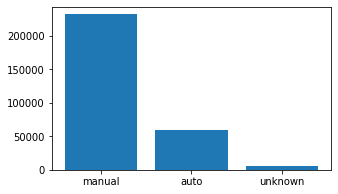

model
golf       24718
other      20094
3er        17385
unknown    10836
polo       10687
Name: model, dtype: int64


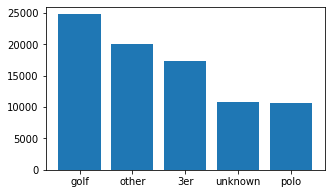

brand
volkswagen       64028
opel             32470
bmw              32251
mercedes_benz    27265
audi             25611
Name: brand, dtype: int64


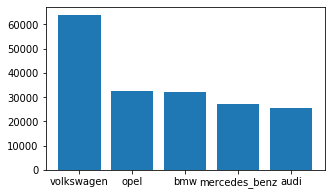

vehicle_type
sedan          82751
small          69929
wagon          59235
bus            26192
convertible    18686
Name: vehicle_type, dtype: int64


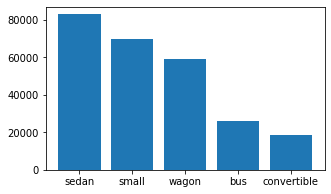

fuel_type
petrol      186853
gasoline     87726
unknown      15494
lpg           4683
cng            483
Name: fuel_type, dtype: int64


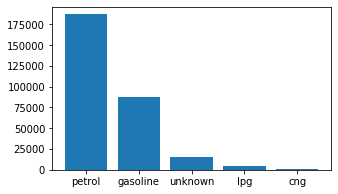

not_repaired
no         224008
unknown     42740
yes         28838
Name: not_repaired, dtype: int64


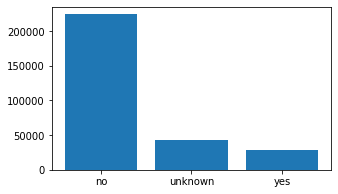

In [168]:
categories = ['gearbox', 'model', 'brand', 'vehicle_type', 'fuel_type', 'not_repaired']

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

### Порядковое кодирование

Преобразуем категориальные признаки в численные с помощью техники порядкового кодирования (англ. Ordinal Encoding). 

Она работает так:

1. Фиксируется, какой цифрой кодируется класс;

2. Цифры размещаются в столбце.

One-Hot Encoding не использовал, потому что в столбце "model" 250 классов.

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295586 entries, 1 to 354368
Data columns (total 11 columns):
price                 295586 non-null int64
vehicle_type          295586 non-null object
registration_year     295586 non-null int64
gearbox               295586 non-null object
power                 295586 non-null int64
model                 295586 non-null object
mileage               295586 non-null int64
registration_month    295586 non-null int64
fuel_type             295586 non-null object
brand                 295586 non-null object
not_repaired          295586 non-null object
dtypes: int64(5), object(6)
memory usage: 27.1+ MB


In [170]:
encoder = OrdinalEncoder()
data_ordinal = data
data_ordinal[["vehicle_type","gearbox", "model", "fuel_type", "brand", "not_repaired"]] = encoder.fit_transform(
    data_ordinal[["vehicle_type","gearbox", "model", "fuel_type", "brand", "not_repaired"]])

### Стандартизация признаков

В данных есть столбцы: power и mileage. Мощность варьируется от 10 до 500 л.с., а пробег — от 5000  до 150000. Алгоритм автоматически решит, что этот пробег важнее мощности. А это не так: все признаки значимы.
Чтобы избежать этой ловушки, признаки масштабируются — приводятся к одному масштабу.
Один из методов масштабирования — стандартизации данных.

Необходимо разбить данные на 3 выборки: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. Используем метод train_test_split дважды. Сначала разобьем весь датасет на 60%(обучающая выборка) и остальное. Затем остальное на валидационную и тестовую по 50%.

In [171]:
y = data_ordinal['price']
X = data_ordinal.drop('price', axis=1)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=12345)

numeric = ['registration_year', 'power', 'mileage', 'registration_month'] # список всех численных признаков

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_val[numeric] = scaler.transform(X_val[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Train shape: (177351, 10)
Validation shape: (59117, 10)
Test shape: (59118, 10)


# 2. Обучение моделей

In [172]:
# Настройка таблицы с результатами
df_results = pd.DataFrame(columns=['rmse', 'run_time'])

### Дерево решений

In [173]:
# Подберем наилучшее дерево решений из 12 вариантов. Какое же будет лучше всех...очень интересно
#(все-таки из-за слабой скорости моего агрегата не хочу рисковать на других моделях):
for depth in range(1, 13):
    m = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    start_time = time()
    m.fit(X_train, y_train)
    run_time = time() - start_time
    rmse = (((y_val-m.predict(X_val))**2).mean())**0.5
    print("max_depth =", depth, "; ", end='')
    print("rmse =", rmse, "; ", end='')
    print("run_time =", run_time)
    print("-------------------------------")

max_depth = 1 ; rmse = 3645.2136000674386 ; run_time = 0.0855870246887207
-------------------------------
max_depth = 2 ; rmse = 3171.817949890604 ; run_time = 0.11259007453918457
-------------------------------
max_depth = 3 ; rmse = 2904.6928137944783 ; run_time = 0.1817626953125
-------------------------------
max_depth = 4 ; rmse = 2580.203309301637 ; run_time = 0.21015429496765137
-------------------------------
max_depth = 5 ; rmse = 2412.000808782748 ; run_time = 0.25589513778686523
-------------------------------
max_depth = 6 ; rmse = 2270.305042639132 ; run_time = 0.3251492977142334
-------------------------------
max_depth = 7 ; rmse = 2168.436708012966 ; run_time = 0.3668065071105957
-------------------------------
max_depth = 8 ; rmse = 2088.730024107152 ; run_time = 0.40324926376342773
-------------------------------
max_depth = 9 ; rmse = 2015.1616903970305 ; run_time = 0.4489467144012451
-------------------------------
max_depth = 10 ; rmse = 1961.6005258695425 ; run_ti

Лучшее дерево решений оказалось с максимальной глубиной равной 12. Его и возьмем для сравнения с другими моделями.

In [174]:
dt = DecisionTreeRegressor(max_depth=12, random_state=1234)

### Случайный лес

In [175]:
rf = RandomForestRegressor (n_estimators = 100, 
                            max_features = 0.06, 
                            n_jobs = 6, 
                            random_state = 1234)

### Adaboost

In [176]:
base_estim = DecisionTreeRegressor(max_depth=1, max_features=0.06)                            
ab = AdaBoostRegressor(base_estimator=base_estim,
                        n_estimators=100,
                        learning_rate=0.5,
                        random_state=1234)

### Gradient Boosted Decision Trees (Scikit-Learn)

In [177]:
gbm = GradientBoostingRegressor(n_estimators=100,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=1234)

### XGBoost

In [178]:
xgb = XGBRegressor(n_estimators=100,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=1234)

### LightGBM

In [179]:
lgbm = LGBMRegressor(n_estimators=100,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234)

### CatBoost

In [180]:
cb = CatBoostRegressor(n_estimators=100,
                        colsample_bylevel=0.06,
                        max_leaves=31,
                        subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)

### Histogram-based Gradient Boosting Machine (Scikit-Learn)

In [181]:
hgbm = HistGradientBoostingRegressor(max_iter=50,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=1234)

### Создание списка моделей

In [182]:
models = [dt, rf, ab, gbm, hgbm, xgb, lgbm, cb]
model_names = [i.__class__.__name__ for i in models]

In [183]:
es_models = ['XGBRegressor',
             'LGBMRegressor',
             'CatBoostRegressor']

In [184]:
for m, n in zip(models, model_names):
    
    start_time = time()
    if n in es_models:
        m.fit(X_train,
              y_train,
              eval_set = [(X_val, y_val)],
              early_stopping_rounds=15,
              verbose=0)
    else:
        m.fit(X_trainval, y_trainval)
    
    run_time = time() - start_time
    rmse = (((y_test-m.predict(X_test))**2).mean())**0.5
    
        
    df_results.loc[n] = [rmse, run_time]
    
    del m

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:03:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Константная модель

In [185]:
# Любому объекту модель прогнозирует среднее значение:
start_time = time()
predicted = pd.Series([y_trainval.mean()]*len(y_test))
run_time = time() - start_time
score = (((y_test-predicted)**2).mean())**0.5
df_results.loc['Constant Model'] = [score, run_time]

# 3. Анализ моделей

In [186]:
df_results

,rmse,run_time
DecisionTreeRegressor,6456.756597,0.779911
RandomForestRegressor,4392.604972,39.910916
AdaBoostRegressor,4442.760151,2.121885
GradientBoostingRegressor,4760.155292,5.792146
HistGradientBoostingRegressor,4440.200223,11.833830
XGBRegressor,1887.357358,17.403550
LGBMRegressor,1933.911616,6.377688
CatBoostRegressor,3780.033106,8.093255
Constant Model,4661.458417,0.009247


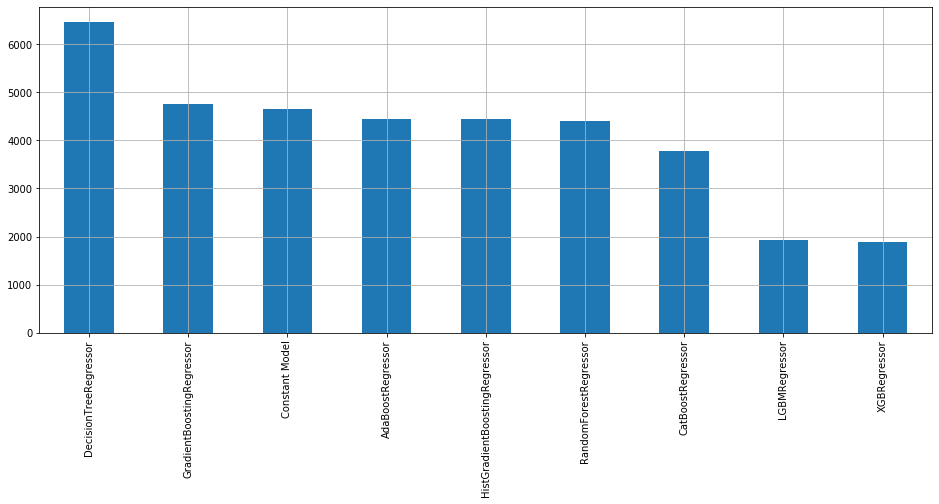

In [187]:
df_results.sort_values('rmse', ascending=False, inplace=True)
df_results['rmse'].plot(kind='bar', grid=True, figsize=(16, 6))


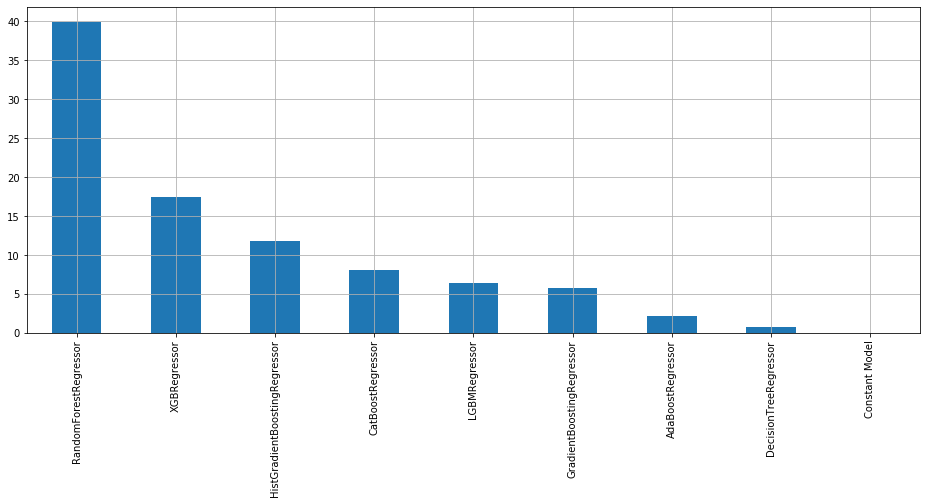

In [188]:
df_results.sort_values('run_time', ascending=False, inplace=True)
df_results['run_time'].plot(kind='bar', grid=True, figsize=(16, 6))

## Вывод:

Наилучшее качество показала модель XGBoost. Совсем чуть-чуть отстала модель LGBM. Но по времени обучения LGBM существенно быстрее. Константная модель показала гораздо более худший результат, значит, все хорошо.